Using TensorFlow backend.


______________________________________________________________________________________________________
170500096/170498071 [==============================] - 273s 2us/step
Loading finsih cifar10

check-out data of cifar10
train legnth of cifar10 :  50000
test  legnth of cifar10 :  10000
train shape of image :  (50000, 32, 32, 3)
train shape of label :  (50000, 1)




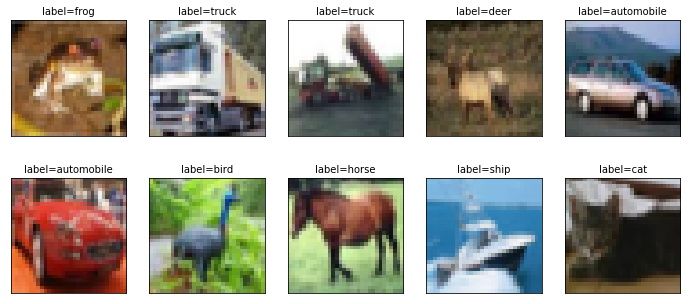

______________________________________________________________________________________________________
building model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
________________________

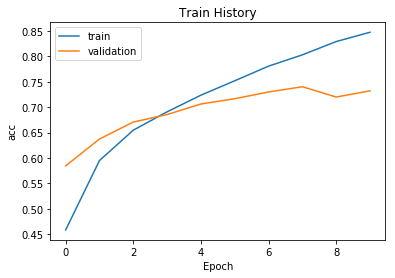

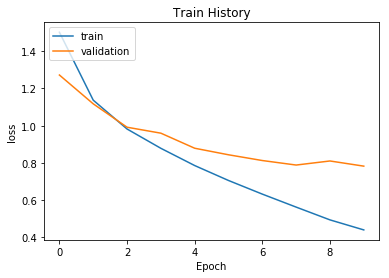


 the scores
10000/10000 [==============================] - 10s 1ms/step
the scores : 0.7264

 the prediction
label :  cat predict: cat


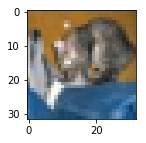

airplane Probability:0.007450827
automobile Probability:0.020264283
bird Probability:0.011312426
cat Probability:0.584585726
deer Probability:0.009401507
dog Probability:0.302029580
frog Probability:0.039656650
horse Probability:0.008284778
ship Probability:0.014909274
truck Probability:0.002104960


In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

from keras.utils import np_utils
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #image of size in figure
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(label_dict[labels[i][0]])
        if len(prediction)>0 : 
            title+=",predict"+str(label_dict[prediction[i]]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#not display scale on figure
        idx+=1
    plt.show()

def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
def show_Predicted_Probability(y,prediction,x_img,predicted_probability,i):
    print('label : ', label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]] )
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_image_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(predicted_probability[i][j]))
        
#______________________________________________________________________________________________________
print('______________________________________________________________________________________________________')
#loading MNIST database
(x_image_train,y_label_train),(x_image_test,y_label_test) = cifar10.load_data()
print('Loading finsih cifar10\n')

#check-out data of cifar10
print('check-out data of cifar10')
print('train legnth of cifar10 : ', len(x_image_train))
print('test  legnth of cifar10 : ', len(x_image_test))
print('train shape of image : ', x_image_train.shape)
print('train shape of label : ', y_label_train.shape)
print('\n')

#cifar have 10 class, follwing 0~10 including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
#define label
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
              5:'dog'     , 6:'frog'      , 7:'horse',8:'ship',9:'truck'}

#show_image of Cifar10
plot_images_labels_prediction(x_image_train, y_label_train,[],0)

#You can see the pixel(RGB) of image and Label, confirm data!
#print('frist image of pixel :', x_image_train[0][0][0])
#print('the labels from 0:5 :',y_label_train[0:5])

#normalize
x_img_train_normalize = x_image_train.astype('float32')/255.0
x_img_test_normalize  = x_image_test.astype('float32')/255.0

#one-hot to label
y_trainOneHot = np_utils.to_categorical(y_label_train)
y_testOneHot  = np_utils.to_categorical(y_label_test)

#You can see the pixel(RGB) of image and Label, confirm data!
#print('the labels :',y_testOneHot[:5])

#______________________________________________________________________________________________________
print('______________________________________________________________________________________________________')
print('building model')

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D,ZeroPadding2D
model = Sequential()

#frist - > convalution and MaxPooling
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape = (32,32,3),activation='relu'))
model.add(Dropout(rate = 0.25)) #solving overfitting
model.add(MaxPooling2D(pool_size=(2,2)))

#second -> convalution and MaxPooling
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.25)) #solving overfitting
model.add(MaxPooling2D(pool_size=(2,2)))


#bulid flatten layer
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024,activation = 'relu')) #hideen layers
model.add(Dropout(0.25))

#Output layer
model.add(Dense(10,activation='softmax'))
print(model.summary())

#______________________________________________________________________________________________________
print('______________________________________________________________________________________________________')
#trainning
try: #check-out model
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print('loading finish')
    
except :
    print('load error, it will bulid a new model')


model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
train_history = model.fit( x_img_train_normalize,y_trainOneHot, validation_split =0.2, epochs=10, batch_size=128, verbose=2)


print('\n\n')
print('show_train_history')
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#______________________________________________________________________________________________________
#the result
print('\n the scores')
scores = model.evaluate(x_img_test_normalize ,y_testOneHot)
print('the scores :',scores[1])

print('\n the prediction')
prediction = model.predict_classes(x_img_test_normalize)
prediction_probability = model.predict(x_img_test_normalize)

show_Predicted_Probability(y_label_test,prediction,x_image_test,prediction_probability,0)

#Saving Model
#model.load_weights("SaveModel/cifarCnnModel.h5")
#print('save model to disk')


#plot_image_labels_prediction(x_test,y_test,prediction,idx=0)
#pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])



In [25]:
prediction.shape
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,769,10,89,19,12,11,18,7,40,25
1,17,831,24,13,6,5,31,4,25,44
2,39,3,648,30,77,57,116,20,6,4
3,9,4,87,495,58,171,156,15,3,2
4,15,3,95,45,651,24,141,20,6,0
5,7,2,61,149,48,599,102,27,3,2
6,3,2,33,27,10,10,913,1,0,1
7,12,1,47,29,86,63,32,725,4,1
8,62,20,33,22,10,10,25,1,798,19
